In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import joblib

In [21]:
df = pd.read_csv(r"D:\Study\Model X\Dementia Prediction\Dataset\Processed\Feature_Engineered.csv")
df.head()

,BIRTHMO,BIRTHYR,SEX,EDUC,NACCAGE,NACCAGEB,INRELTO,TOBAC30,TOBAC100,SMOKYRS,...,INCONTF_2.0,ALCOHOL_0.0,ALCOHOL_1.0,ALCOHOL_2.0,ABUSOTHR_0.0.1,ABUSOTHR_1.0.1,ABUSOTHR_2.0.1,PSYCDIS_0.0.1,PSYCDIS_1.0.1,PSYCDIS_2.0.1
0,-0.142857,0.8125,1,0.0,-0.384615,-0.076923,1.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,False
1,-0.142857,0.8125,1,0.0,-0.307692,-0.076923,1.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,False
2,0.857143,1.0625,1,0.0,-0.692308,-0.384615,1.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,False
3,-0.714286,1.1875,0,0.0,-0.923077,-0.615385,1.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,False
4,-0.571429,0.3750,1,-1.0,0.153846,0.461538,3.0,0.0,0.0,0.0,...,False,True,False,False,True,False,False,True,False,False


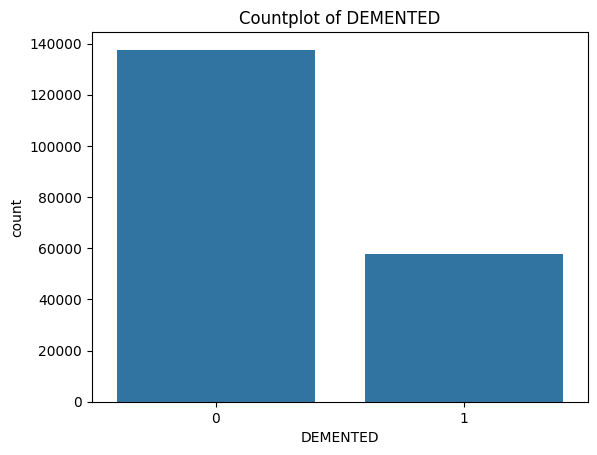

In [22]:
sns.countplot(data=df, x='DEMENTED')
plt.title("Countplot of DEMENTED")
plt.show()

In [23]:
df.shape
df['DEMENTED'].value_counts()

DEMENTED
0    137606
1     57590
Name: count, dtype: int64

In [24]:
# Features and target
X = df.drop(columns=['DEMENTED'])
y = df['DEMENTED']

In [25]:
# Split first
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

# Apply SMOTE only on training data
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

if isinstance(y_train_smote, pd.DataFrame):
    y_train_smote = y_train_smote.iloc[:, 0]

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: DEMENTED
0    110084
1     46072
Name: count, dtype: int64
After SMOTE: DEMENTED
0    110084
1    110084
Name: count, dtype: int64


In [26]:
# Save the SMOTE training set
joblib.dump(X_train_smote, "X_train_smote.pkl")
joblib.dump(y_train_smote, "y_train_smote.pkl")

# Save the test set
joblib.dump(X_test, "X_test.pkl")
joblib.dump(y_test, "y_test.pkl")

['y_test.pkl']